In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [6]:
# load data

mental_2014 = pd.read_csv('data/mental_2014.csv')
mental_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Cleaning

In [7]:
# Dropping unneeded columns

mental_2014 = mental_2014.drop(labels=['Timestamp', 'Country', 'state', 'self_employed', 'obs_consequence', 'comments', 'phys_health_consequence', 'phys_health_interview', 'work_interfere', 'mental_health_interview'], axis=1)
mental_2014.shape

(1259, 17)

In [8]:
mental_2014.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know


In [10]:
mental_2016 = pd.read_csv('data/mental_2016.csv')
mental_2016.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,39,Male,No,0,26-100,Sometimes,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,Maybe,Yes,I don't know
1,29,male,Yes,1,6-25,Never,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,Yes
2,38,Male,No,1,6-25,Always,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Maybe,I don't know
3,43,male,No,1,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43,Female,Yes,1,6-25,Sometimes,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,No


In [11]:
mental_2016.shape

(1433, 17)

In [13]:
mental_2019 = pd.read_csv('data/mental_2019.csv')
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,False,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,False,26-100,True,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,False,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,False,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,False,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [14]:
mental_2019['treatment'] = mental_2019['treatment'].astype(int)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,0,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,0,26-100,True,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,0,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,0,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,0,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [15]:
# deal with null values

mental_2019['tech_company'].fillna(value=False, inplace=True)
mental_2019['tech_company'] = mental_2019['tech_company'].astype(int)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [16]:
# rename and drop columns

mental_2019['mental_vs_physical'] = mental_2019['Overall, how much importance does your employer place on physical health?'] < mental_2019['Overall, how much importance does your employer place on mental health?']
mental_2019.drop(columns=['Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?'], inplace=True)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,False
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,True
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,False
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,True
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,False


In [17]:
mental_2019['mental_vs_physical'] = mental_2019['mental_vs_physical'].replace({True:'Yes', False:'No'})
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,No
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,Yes
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,No
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,Yes
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,No


In [18]:
mental_2016['supervisor'].unique()

array(['Yes', 'Maybe', nan, 'No'], dtype=object)

In [19]:
mental_2019['supervisor'].unique()

array(['Yes', 'Maybe', 'No', nan], dtype=object)

In [20]:
# Combining the two datasets

combined = pd.concat([mental_2014, mental_2016, mental_2019], axis=0)
combined.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know


In [21]:
combined['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No', "I don't know", nan], dtype=object)

In [22]:
combined[combined['mental_vs_physical']=="I don't know"].shape

(493, 17)

In [23]:
# fill maybes to keep data

combined['mental_vs_physical'] = combined['mental_vs_physical'].str.replace("I don't know", 'Yes')
combined['mental_vs_physical'] = combined['mental_vs_physical'].str.replace("Don't know", 'No')

combined['mental_vs_physical'].fillna(value='No', inplace=True)
combined['mental_vs_physical'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
combined.shape

(3044, 17)

In [25]:
combined.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,No


In [26]:
# Fixing null values in 'care_options'

combined['care_options'] = combined['care_options'].str.replace('I am not sure', 'Not sure')
combined['care_options'].unique()

array(['Not sure', 'No', 'Yes', nan], dtype=object)

In [27]:
combined['care_options'].fillna(value='Not sure', inplace=True)
combined['care_options'].isna().sum()

0

In [28]:
# drop unneccesary columns

combined.drop(columns=['Gender', 'remote_work'], inplace=True)
combined.rename(columns={'Age':'age'}, inplace=True)

In [29]:
combined.shape

(3044, 15)

In [30]:
combined.dropna(how='any').shape

(2650, 15)

In [31]:
# cleaned dataset

combined.head()

,age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,No,Yes,6-25,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,No,No,More than 1000,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,No,No,6-25,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Yes,Yes,26-100,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,No,No,100-500,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,No


## Model Building

In [32]:
from sklearn.model_selection import train_test_split

# split into train and test sets and dummy encode

X = pd.get_dummies(combined.drop(['mental_vs_physical'], axis=1))
y = [1 if i == 'Yes' else 0 for i in combined['mental_vs_physical']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

train = X_train.copy()
train['mental_vs_physical'] = y_train

test = X_test.copy()
test['mental-vs_physical'] = y_test

X_train.shape, X_test.shape 

((2435, 58), (609, 58))

In [33]:
# performance metric functions

def TPR(y_test, y_pred):
    """Function that takes in actual y value from test set and predictions from a model and returns the TPR"""
    cm = confusion_matrix(y_test, y_pred)
    return cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])


def FPR(y_test, y_pred):
    """Function that takes in actual y value from test set and predictions from a model and returns the FPR"""
    cm = confusion_matrix(y_test, y_pred)
    return cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])

### Baseline

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
print('1:',np.count_nonzero(y_test))
print('0:',len(y_test) - np.count_nonzero(y_test))

1: 244
0: 365


In [36]:
# Baseline always predicts 0, since 0 is most common classification in test set

y_pred_baseline = np.zeros(len(y_test))

print('Baseline ACC:', accuracy_score(y_test, y_pred_baseline))
print('Baseline TPR:', TPR(y_test, y_pred_baseline))
print('Baseline FPR:', FPR(y_test, y_pred_baseline))

Baseline ACC: 0.5993431855500821
Baseline TPR: 0.0
Baseline FPR: 0.0


### Logistic Regression

In [37]:
# fit logistic regression model

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

# threshold probabilites using 0.5

y_prob = logreg.predict_proba(X_test)
y_pred_logreg = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]])

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print ("Confusion Matrix: \n", cm_logreg)
print ("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print ("TPR:", TPR(y_test, y_pred_logreg))
print ("FPR:", FPR(y_test, y_pred_logreg))

Confusion Matrix: 
 [[299  66]
 [ 69 175]]
Accuracy: 0.7783251231527094
TPR: 0.7172131147540983
FPR: 0.18082191780821918


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# first try grid search for best ccp_alpha

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 51)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

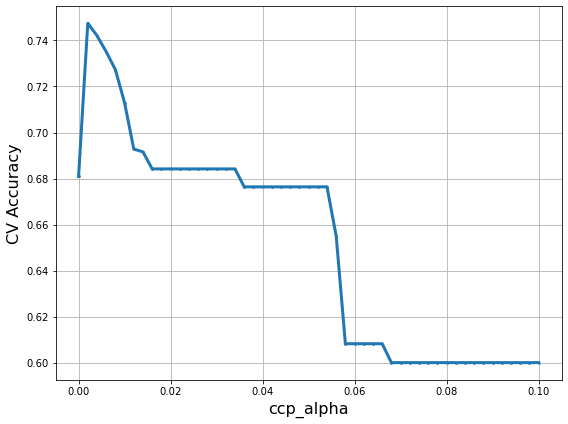

Best ccp_alpha {'ccp_alpha': 0.002}


In [39]:
# plot ccp_alpha values from grid search first try

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [40]:
# second try grid search for best ccp_alpha with smaller range

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

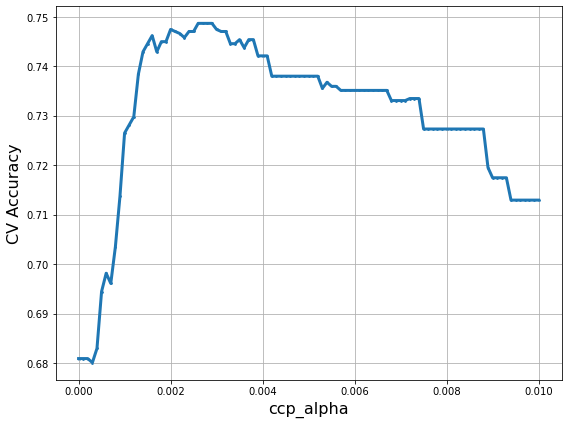

Best ccp_alpha {'ccp_alpha': 0.0026000000000000003}


In [41]:
# plot ccp_alpha values from grid search second try

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [42]:
# predictions for dtc model

y_pred_dtc = dtc_cv.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

print ("Confusion Matrix: \n", cm_dtc)
print ("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print ("TPR:", TPR(y_test, y_pred_dtc))
print ("FPR:", FPR(y_test, y_pred_dtc))

Confusion Matrix: 
 [[271  94]
 [ 56 188]]
Accuracy: 0.7536945812807881
TPR: 0.7704918032786885
FPR: 0.25753424657534246


### Vanilla Bagging

In [43]:
from sklearn.ensemble import RandomForestClassifier

# random forest model with max_features set to the total number of features 

bagging = RandomForestClassifier(max_features=len(X_train.columns), random_state=1)
bagging.fit(X_train, y_train)

RandomForestClassifier(max_features=58, random_state=1)

In [44]:
# preditions for bagging 

y_pred_bagging = bagging.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

print ("Confusion Matrix: \n", cm_bagging)
print ("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print ("TPR:", TPR(y_test, y_pred_bagging))
print ("FPR:", FPR(y_test, y_pred_bagging))

Confusion Matrix: 
 [[287  78]
 [ 83 161]]
Accuracy: 0.735632183908046
TPR: 0.6598360655737705
FPR: 0.2136986301369863


### Random Forest

In [45]:
# grid search for max_features

grid_values = {'max_features': np.linspace(1,8,8, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   52.1s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             verbose=1)

In [46]:
# predictions for rf model

y_pred_rf = rf_cv.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_rf))
print ("TPR:", TPR(y_test, y_pred_rf))
print ("FPR:", FPR(y_test, y_pred_rf))

Confusion Matrix: 
 [[291  74]
 [ 70 174]]
Accuracy: 0.7635467980295566
TPR: 0.7131147540983607
FPR: 0.20273972602739726


### Linear SVM

In [47]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# grid search for C

grid_values = {'C': np.logspace(-2,2,10),
               'penalty': ['l2'],
               'loss': ['hinge']} 

tic = time.time()

svm = LinearSVC() 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train, y_train)
svm_cv = GridSearchCV(svm, param_grid=grid_values, cv=5, verbose=1)
svm_cv.fit(scaled_x, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Co

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

time: 9.32 s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [48]:
# predictions for linear SVM model

y_pred_svm = svm_cv.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_svm)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_svm))
print ("TPR:", TPR(y_test, y_pred_svm))
print ("FPR:", FPR(y_test, y_pred_svm))

Confusion Matrix: 
 [[ 54 311]
 [  0 244]]
Accuracy: 0.48932676518883417
TPR: 1.0
FPR: 0.852054794520548


### RBF SVM

In [49]:
# grid search for C, gamma

grid_values = {'C': np.logspace(-2,2,10),
               'gamma': np.logspace(-9, 3, 13),
                'kernel': ['rbf']} 

tic = time.time()

svm_rbf = SVC() 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train, y_train)
svm_cv_rbf = GridSearchCV(svm_rbf, param_grid=grid_values, cv=5, verbose=1)
svm_cv_rbf.fit(scaled_x, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:  4.0min finished


time: 242.58 s


In [50]:
# predictions for RBF SVM model

y_pred_svm_rbf = svm_cv_rbf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_svm_rbf)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print ("TPR:", TPR(y_test, y_pred_svm_rbf))
print ("FPR:", FPR(y_test, y_pred_svm_rbf))

Confusion Matrix: 
 [[343  22]
 [185  59]]
Accuracy: 0.6600985221674877
TPR: 0.24180327868852458
FPR: 0.06027397260273973


## Evaluate Models

In [51]:
# table to evaluate performance of models

comparison_data = {'Baseline': [accuracy_score(y_test, y_pred_baseline), 
                                           TPR(y_test, y_pred_baseline), FPR(y_test, y_pred_baseline)],
                    'Logistic Regression': [accuracy_score(y_test, y_pred_logreg), 
                                           TPR(y_test, y_pred_logreg), FPR(y_test, y_pred_logreg)],
                   'Decision Tree': [accuracy_score(y_test, y_pred_dtc), TPR(y_test, y_pred_dtc), 
                                     FPR(y_test, y_pred_dtc)], 
                   'Vanilla Bagging': [accuracy_score(y_test, y_pred_bagging), TPR(y_test, y_pred_bagging), 
                                     FPR(y_test, y_pred_bagging)], 
                   'Random Forest': [accuracy_score(y_test, y_pred_rf), TPR(y_test, y_pred_rf), FPR(y_test, y_pred_rf)],
                   'Linear SVM': [accuracy_score(y_test, y_pred_svm), TPR(y_test, y_pred_svm), FPR(y_test, y_pred_svm)],
                    'RBF SVM': [accuracy_score(y_test, y_pred_svm_rbf), TPR(y_test, y_pred_svm_rbf), 
                                FPR(y_test, y_pred_svm_rbf)]}

performance_df = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR'])
performance_df

,Baseline,Logistic Regression,Decision Tree,Vanilla Bagging,Random Forest,Linear SVM,RBF SVM
Accuracy,0.599343,0.778325,0.753695,0.735632,0.763547,0.489327,0.660099
TPR,0.000000,0.717213,0.770492,0.659836,0.713115,1.000000,0.241803
FPR,0.000000,0.180822,0.257534,0.213699,0.202740,0.852055,0.060274


## Final Model: Logistic Regression

In [79]:
# coefficients for logreg

logreg.coef_[0]

array([-9.43210362e-04, -4.78958026e-01, -4.87255419e-01, -4.75101588e-01,
       -5.26417747e-01, -6.29971985e-01, -7.48507033e-02, -2.10074597e-01,
        6.70570566e-01,  6.90588996e-02,  1.98552741e-01, -1.21134832e-02,
        4.15364482e-01, -3.67547304e-01,  1.95593491e-01,  5.85886086e-01,
       -3.15728421e-01,  3.08031205e-02, -7.54289308e-02,  2.91751629e-01,
        2.87883110e-01,  5.80520287e-01, -3.26005529e-01,  2.15165335e-01,
       -4.83182255e-01, -2.98510475e-01, -6.59622302e-01,  3.22107056e-01,
        3.82766967e-01, -7.47722709e-02,  3.43784150e-01,  2.39334896e-01,
        2.14046130e-01, -4.24357004e-02,  5.62940576e-01, -4.67730797e-01,
        7.65396514e-01,  1.36572282e-01,  5.39647903e-01, -3.54252557e-01,
       -4.55096561e-01,  2.69208772e-01,  3.93514472e-01,  7.28704591e-02,
        3.30369286e-01,  1.29445810e-02,  7.04327450e-01,  8.10910574e-01,
        1.11377621e+00, -1.65397956e-01,  2.71363819e-01,  4.77527029e-01,
        4.34699103e-02,  

In [80]:
# find features with most important negative and positive coefficient

pos_index = np.argmax(logreg.coef_[0])
neg_index = np.argmin(logreg.coef_[0])

print("positive feature:", X_train.columns[pos_index])
print("negative feature:", X_train.columns[neg_index])

positive feature: mental_health_consequence_No
negative feature: care_options_Yes


### Second best model: Random Forest 

In [81]:
# importance score for random forest

pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1).sort_values(
                    'Importance score', ascending=False)

,Feature,Importance score
48,mental_health_consequence_No,9.2
15,tech_company_1.0,8.8
0,age,5.6
36,anonymity_I don't know,5.5
57,supervisor_Yes,5.3
46,leave_Very easy,4.3
35,anonymity_Don't know,3.6
38,anonymity_Yes,3.3
47,mental_health_consequence_Maybe,3.2
54,supervisor_Maybe,3.0


In [82]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(max_features=rf_cv.best_params_['max_features'], min_samples_leaf=5,
               n_estimators=500,
               random_state=8))
sel.fit(X_train, y_train)

sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True])

In [83]:
selected_feat = X_train.columns[(sel.get_support())]
selected_feat

Index(['age', 'tech_company_1.0', 'care_options_Not sure',
       'wellness_program_Yes', 'seek_help_Yes', 'anonymity_Don't know',
       'anonymity_I don't know', 'anonymity_Yes', 'leave_Don't know',
       'leave_Very easy', 'mental_health_consequence_Maybe',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'coworkers_Maybe', 'coworkers_Yes', 'supervisor_Maybe', 'supervisor_No',
       'supervisor_Yes'],
      dtype='object')

### Look at correlation between independent variables in train set and dependent variable

In [84]:
corr = pd.get_dummies(train).corr()[['mental_vs_physical']].sort_values('mental_vs_physical', ascending=False).iloc[1:,:]



In [85]:
positive_corr = corr[corr['mental_vs_physical'] > 0]
negative_corr = corr[corr['mental_vs_physical']<0]

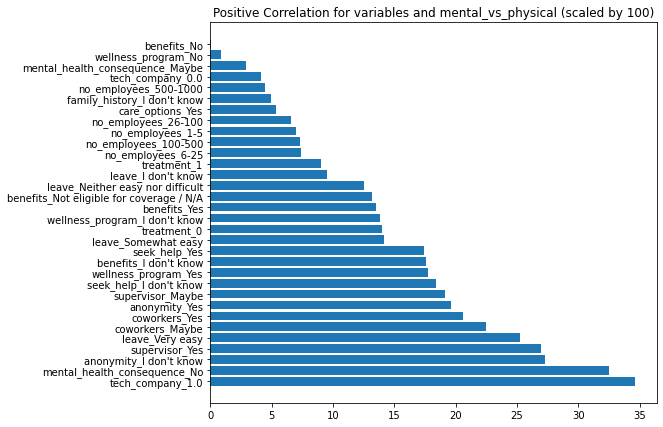

In [86]:
# positive correlation bar graph

plt.figure(figsize=(8,7))
plt.barh(positive_corr.index, 100*positive_corr['mental_vs_physical'])
plt.title('Positive Correlation for variables and mental_vs_physical (scaled by 100)');
plt.show()

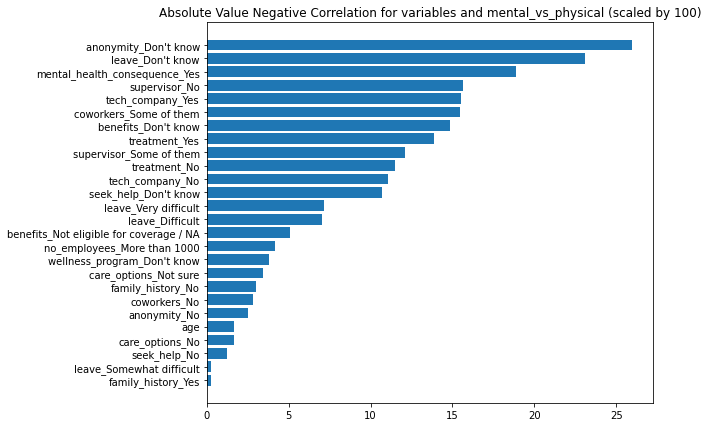

In [87]:
# negative correlation bar graph

plt.figure(figsize=(8,7))
plt.barh(negative_corr.index, abs(100*negative_corr['mental_vs_physical']))
plt.title('Absolute Value Negative Correlation for variables and mental_vs_physical (scaled by 100)');
plt.show()